In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np

# Environment

In [ ]:
class GridWorld:
    def __init__(self, size=4, terminal_states=((0, 0), (3, 3)), reward=-1) -> None:
        self.size = size
        self.terminal_states = terminal_states
        self.reward = reward
        self.actions = ("U", "D", "L", "R")
        self.reset()

    def is_terminal(self, state) -> bool:
        return state in self.terminal_states

    def reset(self):
        self.state = (np.random.randint(self.size), np.random.randint(self.size))
        while self.state in self.terminal_states:
            self.state = (np.random.randint(self.size), np.random.randint(self.size))
        return self.state

    def step(self, action):
        if self.is_terminal(self.state):
            return self.state, 0, True

        x, y = self.state
        if action == "U":
            x = max(x - 1, 0)
        if action == "D":
            x = min(x + 1, self.size - 1)
        if action == "L":
            y = max(y - 1, 0)
        if action == "R":
            y = min(y + 1, self.size - 1)
        self.state = (x, y)

        return self.state, self.reward, self.is_terminal(self.state)


def uniform_random_policy(state):
    """
    Uniform random policy: returns a random action.
    """

    return np.random.choice(["U", "D", "L", "R"])


def generate_episode(env, policy):
    """
    Generates an episode following a given policy.
    """

    episode = []
    state = env.reset()
    done = False

    while not done:
        action = policy(state)

        next_state, reward, done = env.step(action)

        transition = (state, action, reward)
        episode.append(transition)

        state = next_state

    return episode

In [ ]:
def temporal_difference_prediction(env, policy, num_episodes=500, gamma=1.0, alpha=0.1):
    V = np.zeros((env.size, env.size))

    for _ in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            action = uniform_random_policy(state)

            # Step in the environment
            next_state, reward, done = env.step(action)

            # TD(0) update rule
            td_target = reward + gamma * V[next_state]
            td_error = td_target - V[state]
            V[state] += alpha * td_error

            # Move to the next state
            state = next_state

    return V


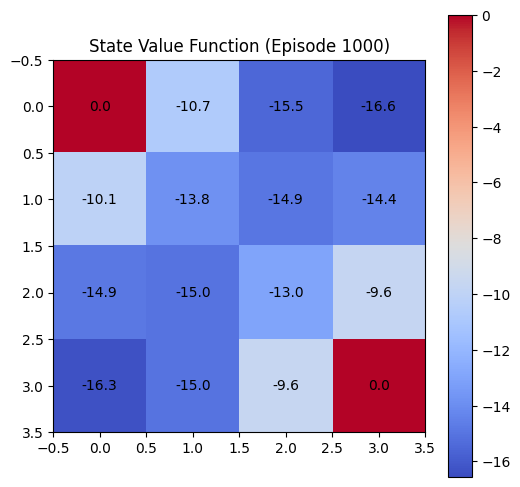

In [ ]:
def plot_value_function(V, size=4, episode=0):
    plt.figure(figsize=(6, 6))
    plt.imshow(V, cmap="coolwarm", interpolation="nearest")
    for i in range(size):
        for j in range(size):
            plt.text(j, i, f"{V[i, j]:.1f}", ha="center", va="center", color="black")
    plt.title(f"State Value Function (Episode {episode})")
    plt.colorbar()
    plt.show()


def animate_value_function(value_snapshots):
    fig, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(value_snapshots[0], cmap="coolwarm", interpolation="nearest")
    ax.set_title("State Value Function Evolution")

    def update(frame):
        im.set_array(value_snapshots[frame])
        ax.set_title(f"State Value Function (Episode {frame + 1})")
        return [im]

    ani = animation.FuncAnimation(
        fig, update, frames=len(value_snapshots), interval=200
    )

    ani.save("td_evolution.mp4", writer="ffmpeg", fps=10)


N = 1_000

env = GridWorld()
V = temporal_difference_prediction(
    env, uniform_random_policy, num_episodes=N, gamma=1.0, alpha=0.02
)
plot_value_function(V, env.size, N)

# Animate the value function evolution
# animate_value_function(value_snapshots)